# DATA 5600: Introduction to Regression and Machine Learning for Analytics

## __Chapter 3: Some Basic Methods in Mathematics and Probability__ <br>

Author:      Tyler J. Brough <br>
Updated: September 15, 2021 <br>

---

<br>

## __Section 3.0: Python Imports__

In [2]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [10, 5]

<br>
<br>

---

## __Section 3.1: Weighted Averages__

<br>

<br>

__Example:__ Populations and average ages of countries in North America

<br>


| Stratum, $j$ | Label         | Population, $N_{j}$ | Average age, $\bar{y}_{j}$ |
|:------------:|:--------------|--------------------:|:--------------------------:| 
| 1            | United States | 310 million         | 36.8                       |
| 2            | Mexico        | 112 million         | 26.7                       |
| 3            | Canada        | 34 million          | 40.7                       |

<br>

* In 2010 there 456 million people in North America
    - 310 million in the United States
    - 112 million in Mexico
    - 34 million in Canada
    
<br>

The average age of all North Americans is a ___weighted average___:

<br>

$$
\huge{\mbox{average age} = \frac{310,000,000 \ast 36.8 + 112,000,000 \ast 26.7 + 34,000,000 \ast 40.7}{310,000,000 + 112,000,000 + 34,000,000} = 34.6 \mbox{ years.}}
$$

<br>


* The total poplation was $310 + 112 + 34 = 456$ million

<br>

* We can rewrite the above as:

$$
\begin{align}
\mbox{average age} &= \frac{310}{456} \ast 36.8 + \frac{112}{456} \ast 26.7 + \frac{34}{456} \\
                   & \\
                   &= 0.6798 \ast 36.8 + 0.2456 \ast 26.7 + 0.0746 \ast 40.7 \\
                   & \\
                   & = 34.6
\end{align}
$$

<br>

* The proportions $0.6798$, $0.2456$, and $0.0746$ are the _weights_ of the countries in this weighted average.

<br>

We can equivalently write a weighted average in summation notation:

<br>

$$
\large{\mbox{weighted average} = \frac{\sum_{j} N_{j} \bar{y}_{j}}{\sum_{j} N_{j}}}
$$

<br>

* where $j$ indexes countries and the sum adds over all the _strata_ (in this case, the three countries)

<br>

__NB:__ we can also write a weighted average as: $\mbox{weighted average} = \sum_{j} \omega_{j} \bar{y}_{j}$ where $\omega_{j} \quad$ are the weights and $\bar{y}_{j}\quad$ are the strata values.

<br>

* So in our example above: $\omega_{1} = 0.6798$, $\omega_{2} = 0.2456$, and $\omega_{3} = 0.0746$

* $\bar{y}_{1} = 36.8$, $\bar{y}_{2} = 26.7$, and $\bar{y}_{3} = 40.7$

* So then:

<br>

$$
\begin{align}
\mbox{weighted average} &= \sum_{j} \omega_{j} \bar{y}_{j} \\
                        &= (\omega_{1} \ast \bar{y}_{1}) + (\omega_{2} \ast \bar{y}_{2}) + (\omega_{3} \ast \bar{y}_{3}) \\
                        &= (0.6798 \ast 36.8) + (0.2456 \ast 26.7) + (0.0746 \ast 40.7) \\
                        &= 34.6
\end{align}
$$

<br>
<br>

In [6]:
## It's trivial to do weighted averages in Python
populations = np.array([310000000, 112000000, 34000000])
average_ages = np.array([36.8, 26.7, 40.7])
weights = populations / populations.sum()
weighted_average_age = np.sum(weights * average_ages) # NB: the multiplication is element-wise

## Print a nicely formatted string
print(f"\nThe weighted average age in North America is: {weighted_average_age : 0.2f} years\n")


The weighted average age in North America is:  34.61 years



<br>
<br>

---

## __Section 3.2: Vectors and Matrices__

<br>

<br>

* A list of numbers is called a ___vector___


* A rectangular array of numbers is called a ___matrix___


* Vectors and matrices are useful in regression to represent predictions for many use cases using a single model


<br>

__Example:__ Model for predicting incumbent party's vote percentage in US presidential elections from economic conditions the years preceding

<br>

$$
\mbox{Predicted vote share} = 46.3 + 3.0 \ast (\mbox{growth rate of average personal income}) 
$$

<br>

Which we can write as:

<br>

$$
\begin{align}
\hat{y} &= 46.3 + 3.0x \\
        & \\
\hat{y} &= \hat{a} + \hat{b} x \\
\end{align}
$$

<br>

* The expressions $\hat{a}$ and $\hat{b}$ denote estimates - the coefficients: $\hat{a} = 46.3$ and $\hat{b} = 3.0$ 

* These were obtained by fitting a line to past data

* $\hat{y}$ denotes a predicted value

* We will use $y$ to represent an actual election result, and $\hat{y}$ 

<br>

Let's apply this model to a few different cases:

1. $x = -1$. A rate of growth of $-1\%$ (that is, a $1\%$ decline in the economy) translates into an incumbent party vote share of $46.3 + 3.0 \ast (-1) = 43.3\%$

2. $x = 0$. If there is zero economic growth in the year preceding the presidential election, the model predicts that the incumbent party's candidate will receive
   $46.3 + 3.0 \ast 0 = 46.3\%$ of the two-party vote; that is, he or she is predicted to lose the election.
   
3. $x = 3$. A $3\%$ rate of economic growth tranlsates to the incumbent party's candidate winning $46.3 + 3.0 \ast 3 = 55.3\%$ of the vote. 


<br>

We can put these three predictions together: 

<br>

$$
\begin{align}
\hat{y}_{1} & = 43.3 = 46.3 + 3.0 \ast (-1) \mbox{,} \\
            &  \\
\hat{y}_{2} & = 46.3 = 46.3 + 3.0 \ast (0) \mbox{,} \\
            & \\
\hat{y}_{3} & = 55.3 = 46.3 + 3.0 \ast (3) \mbox{,}
\end{align}
$$

<br>

And we can write them as vectors: 

<br>

$$
\hat{y} = \begin{bmatrix} 43.3 \\ 46.3 \\ 55.3 \\ \end{bmatrix} = \begin{pmatrix} 46.3 + 3.0 \ast (-1) \\ 46.3 + 3.0 \ast (0)  \\ 46.3 + 3.0 \ast (3)  \\ \end{pmatrix}
$$

<br>

Or in matrix form:

<br>

$$
\hat{y} = \begin{pmatrix} 43.3 \\ 46.3 \\ 55.3 \\ \end{pmatrix} = \begin{pmatrix} 1 \quad -1 \\ 1 \quad 0 \\ 1 \quad 3 \\ \end{pmatrix} \begin{pmatrix} 46.3 \\ 3.0 \end{pmatrix}
$$ 

<br>

Or even more abstractly:

<br>

$$
\hat{y} = X \hat{\beta}
$$

<br>

* Here $y$ and $x$ are vectors of length 3

* $X$ is a $3 \times 2$ matrix with a column of ones and a column equal to the vector $x$

* $\hat{\beta} = (46.3, 3.0)$ is a estimated coefficients

<br>
<br>

In [7]:
## We can represent these with ndarrays from numpy
X = np.array([[1,-1], [1, 0], [1, 3]])
X

array([[ 1, -1],
       [ 1,  0],
       [ 1,  3]])

In [8]:
beta_hat = np.array([46.3, 3.0])
beta_hat

array([46.3,  3. ])

In [9]:
y_hat = np.dot(X, beta_hat)
y_hat

array([43.3, 46.3, 55.3])

<br>
<br>

---

## __Section 3.3: Graphing a Line__

<br>

<br>

* To use linear regression effectively, you need to understand the algebra and geometry of straight lines

<br>
<br>

$$
\Large{y = a + bx}
$$

<br>


* $a$ is the _intercept_, the value of $y$ when $x = 0$

* $b$ is the _slope_ of the line
    - The line slopes upward if $b > 0$
    - The line slopes downward if $b < 0$
    - The line is horizontal if $b = 0$
    
* The larger the $b$ is in absolute value the steeper the line will be

<br>

* Figure 3.2 shows the line $y = 1007 - 0.39x$

* $y = 1007$ when $x = 0$

* $y$ decreases by $0.39$ when $x$ increases by 1 unit

* This line approximates the trajectory of the world record time (in seconds) for the mile run from 1900 to 2000

<br>

This is easy in `Python` with the `matplotlib` module

<br>
<br>

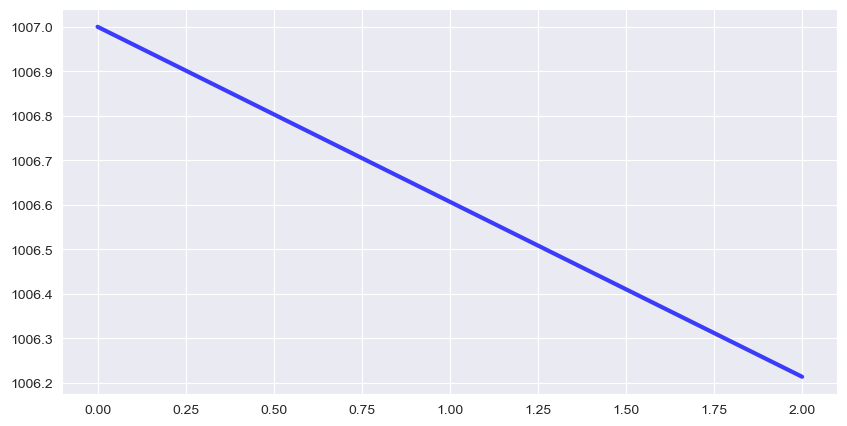

In [10]:
## Plot a simple line in matplotlib.pyplot
x = np.linspace(0, 2, 100)
y = 1007 - 0.393*x
plt.plot(x, y, lw = 3.0, color='blue', alpha=0.75)
plt.show()

In [12]:
np.arange??

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range` function, but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, the results will often not
be consistent.  It is better to use `numpy.linspace` for these cases.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
stop : integer or real
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
step : integer or real, optional
    Spacing between values.  For any output `out`, this is the distance
  

<br>
<br>

---

## __Section 3.4: Exponential and Power-Law Growth and Decline; Logarthmic and Log-Log Relationships__

<br>

<br>

* We can express a more general class of relationships be allowing logarithmic transformations

* The formula $\log{(y)} = a + bx$ represents exponential growth (if $b > 0$) or decline (if $b < 0$): $y = Ae^{bx}$ where $A = e^{a}$

* The parameter $A$ is the value of $y$ when $x = 0$

* The parameter $b$ determines the rate of growth or decline

* A one-unit difference in $x$ corresponds to an additive difference of $b$ in $\log{(y)}$
    - Thus a multiplicative factor of $e^{b}$ in $y$
    
<br>
<br>

#### __Exponential Growth__

<br>

__Two Examples:__ 

___1. Exponential growth___
    
- Suppose the world population starts at 1.5 billion in the year 1900 and increases exponentially,, doubling every 50 years (not an accurate description, just a crude approximation)
   
- We can write this as $y = A \ast 2^{(x - 1900)/50}$
  
- $A = 1.5 \ast 10^{9}$
   
- Equivalently, $y = A e^{\log{(2)}/50(x - 1900)} = A e^{0.014(x - 1900)}$
    
- NB: in statistics we use "log" to refer to the natural logarithm (log base $e$, not base $10$). See Section 12.4

- The model $y = A e^{0.014(x - 1900)}$ is exponential growth with a rate of $0.014$, which implies that $y$ increases by a factor of $e^{0.014}$ = 1.014$ per year

- Or $e^{0.14} = 1.15$ per ten years

- Or $e^{1.4} = 4.0$ per hundred years

- We can take the log of both sides of the equation to get

<br>

$$
\large{\log{(y)} = 21.1 + 0.014(x - 1900)}
$$

<br>

- NB: $\log{(A)} = \log{(1.5 \ast 10^{9}} = 21.1$
    
    
<br>

___2. Exponential Decline___

- Consider an asset that is initially worth $\$1000$ and declines in value by $20\%$ each year

- Then its value at year $x$ will be $y = 1000 \ast 0.8^{x}$

- Or $y = 1000 e^{\log{(0.8)}x} = 1000e^{-0.22x}$

- Logging both sides yields the following

<br>

$$
\large{\log{(y)} = \log{(1000)} - 0.22x = 6.9 - 0.22x}
$$

<br>
<br>

#### __Power-Law Growth and Decline__

<br>


- The formula $\log{(y)} = a + b \log{(x)}$ represents power-law growth (if $b > 0$) or decline (if $b < 0$):

- $y = Ax^{b}$, where $A = e^{a}$

- The parameter $A$ is the value of $y$ when $x = 1$

- The parameter $b$ determines the rate of growth or decline

- A one-unit difference in $\log{(x)}$ corresponds to an additive difference of $b$ in $\log{(y)}$

<br>

__Two Examples:__


__1. Power Law__

- Let $y$ be the area of a square and $x$ be its perimeter

- Then $y = (x/4)^{2}$

- Take the log of both sides: $\log{(y)} = 2 (\log{(x)} - \log{(4)}) = -2.8 + 2 \log{(x)}$

<br>

__2. Non-integer Power Law__

- Let $y$ be the surface area of a cube and $x$ be its volume

- If $L$ is the length of a side of the cube, then $y = 6L^{2}$ and $x = L^{3}$, 

- Hence the relation between $y$ and $x$ is $y = 6x^{2/3}$

- Thus $\log{(y)} = \log{(6)} + \frac{2}{3} \log{(x)} = 1.8 + \frac{2}{3}\log{(x)}$

<br>
<br>

#### __Interpreting Power-Law  or Log-Log Regressions__

- Placeholder item 1

- Placeholder item 2

- ...

<br>
<br>

<br>
<br>

--- 

## __Section 3.5: Probability Distributions__

<br>

<br>

- In section 3.3 we reviewed straight-line prediction which is the deterministic part of linear regression (and a key building block)

- Now we want to introduce probability distributions and random variables (we need these because our models do not fit our data exactly)

- Probability distributions represent the unmodeled aspects of reality - the ___error term $\epsilon$___ in the expression

<br>

$$
\Large{y = a + b x + \epsilon}
$$

<br>

- When a ball is drawn "at random", the ___random variable___ is what is written on the ball

- This treatment is rather informal (not axiomatic)

- We mix conceptual definitions with mathematical formulas where we think these will be useful

<br>

#### __Application Areas of Probability Distributions in Regression Modeling__

<br>

- Distributions of data (for example, heights of men, incomes of women, political party preference), for which we will use the notation $y_{i}, \mbox{ for } i = 1, \ldots, n$.

- Distributions of error terms, which we will write as $\epsilon_{i}, \mbox{ for } i = 1, \ldots, n$.

- A key thing in regression modeling is to describe the typical range of values of the outcome variable, given the predictors

- This is done in two steps: 
    1. Predict the average value of the outcome given the predictors
    2. Summarize the variation in this prediction
    
- Probabilistic distributions are used in regression modeling to help us characterize the variation that remains ___after___ predicting the average

- This helps us get an understanding of how uncertain our predictions are

- And also how uncertain we are in our estimated parameters of the model

<br>

#### __The Mean and Standard Deviation of a Probability Distribution__

<br>

- A probability distribution of a random variable $z$ takes on some range of values (the numbers written on the balls drawn from the urn)

- The ___mean___ (or _expected value_) of this distribution is the average of all these numbers or the number that would be obtained on average from a random sample from the distribution

- $E(z) = \mu_{z}$ is how we write the expected value in symbols

- See figure 3.6 for a distribution of women's heights in the United States

- The mean is $63.7$ inches: 
    - This is the average height of all women in the country   
    - It is also the value we would expect to observe by sampling one woman at random from the population
 



- The ___variance___ of the distribution of $z$ is $E[(z - \mu_{z})^{2}]$

- The mean of the squared difference from the mean

- The ___standard deviation___ is the square root of the variance

- We typically work with the standard deviation rather than variance because it is in terms of the scale of the random variable $z$

- From Figure 3.6 the standard deviation of women's heights in the United States is 2.7 inches

- The variance of 7.3 is on the uninterpretable scale of inches squared

<br>

## __Section 3.6: Probability Modeling__

## __Section 3.7: Bibliographic Note__